# Proyecto Python Machine Learning 🤖👾🧠

## Máquinas de soporte vectorial 💻💡📉📊📈

Las maquinas de soporte vectorial son un conjunto de algoritmos de aprendizaje supervisado desarrollados por Vladimir Vapnik y su equipo en los laboratorios AT&T.

Una SVM construye un hiperplano o conjunto de hiperplanos en un espacio de dimensionalidad muy alta (o incluso infinita) que puede ser utilizado en problemas de clasificación o regresión. Una buena separación entre las clases permitirá una clasificación correcta.

## Sobre el proyecto

En este proyecto se verán las direferntes maneras de representar una msv y modelar los datos. Despues un ejemplo practico para comprarar los metodos antes vistos y que se ajuste mejor a los datos.

### Primer ejemplo

La relación entre las técnicas o algoritmos es la siguiente; el primero es Margen Maximal de Clasificación (MMC), su generalización es Soporte de Vectores para Clasificación (SVC) y esta a su vez se generaliza a SVM.

A lo que se refiere el algoritmo con el nombre de Margen Maximal, es al margen que se obtiene entre las dos clases de datos, siendo el margen la distancia entre las líneas punteadas.

Automatically created module for IPython interactive environment


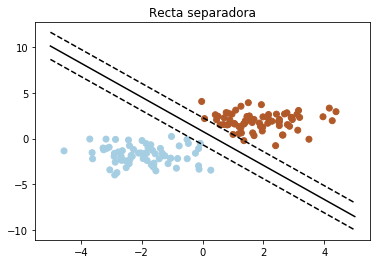

In [1]:
#MMC 
print(__doc__)

#Librerías requeridas

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Se crean los datos
np.random.seed(0)
X = np.r_[np.random.randn(70, 2) - [2, 2], np.random.randn(70, 2) + [2, 2]]
Y = [0] * 70 + [1] * 70

#Se estima el modelo
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# Se construye la recta que separa las clases
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]


# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

#Gráfica
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
 s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.title('Recta separadora')
plt.axis('tight')
plt.show()

### Segundo ejemplo

El código muestra el ejemplo de como se separan de manera no lineal las fronteras.
Los datos Iris nos permiten mostrar como se generaliza el uso de los margenes que separan los datos, cuando no son líneas rectas. Veremos el ejemplo de SVC con kernel lineal, Lineal SVC, SVC con RBF kernel, SVC con polinomio(grado 3) kernel


Automatically created module for IPython interactive environment


C:\Users\carof\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


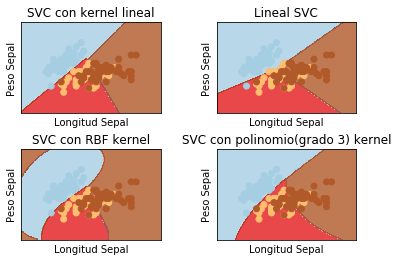

In [2]:
#Código

print(__doc__)

#Módulos
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

#Se importan los datos
iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target

h = .02

#Parámetro de regularización
C = 1.0 

svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

#Probé pero no me gustó el resultado con sigmoid
#sigmoid_svc=svm.SVC(kernel='sigmoid').fit(X,y)

#Se crean los marcos para las gráficas

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

#Títulos para las gráficas
titles = ['SVC con kernel lineal',
 'Lineal SVC',
 'SVC con RBF kernel',
 'SVC con polinomio(grado 3) kernel']


for i, clf in enumerate((svc,lin_svc, rbf_svc, poly_svc)):
 # Se grafican las fronteras 
 plt.subplot(2, 2, i + 1)
 plt.subplots_adjust(wspace=0.4, hspace=0.4)

 Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

 #Color en las gráficas
 Z = Z.reshape(xx.shape)
 plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

 #Puntos de entrenamiento
 plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
 plt.xlabel('Longitud Sepal')
 plt.ylabel('Peso Sepal')
 plt.xlim(xx.min(), xx.max())
 plt.ylim(yy.min(), yy.max())
 plt.xticks(())
 plt.yticks(())
 plt.title(titles[i])

plt.show()


### Tercer ejemplo

El otro uso es para estimar la regresión y un ejemplo visual que se aprecia rápido es en la regresión de datos en dos dimensiones, es decir; en el plano.

Automatically created module for IPython interactive environment


AttributeError: module 'matplotlib.pyplot' has no attribute 'hold'

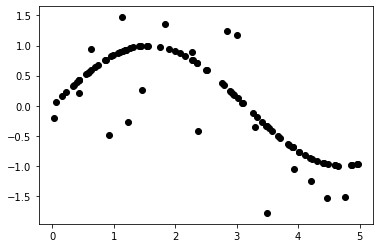

In [11]:
#Generación de datos

print(__doc__)
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

#Generación de datos
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(20))

#Modelos regresión fit

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

#Mirando los resultados

plt.scatter(X, y, c='k', label='datos')
plt.hold('on')
plt.plot(X, y_rbf, c='g', label='Modelo RBF ')
plt.plot(X, y_lin, c='r', label='Modelo Lineal')
plt.plot(X, y_poly, c='b', label='Modelo Polinomial')
plt.xlabel('datos')
plt.ylabel('target')
plt.title('M. De Soport de Vectores')
plt.legend()
plt.show()

### Ejemplo practico

Para este ejemplo practico se emplearan los siguientes pasos


1. Procesar y limpiar los datos.
2. Asignar la variable de clasificación o indicadora.
3. Entrenar el algoritmo y comparar con el conjunto de prueba.
4. Comparar contra otro algoritmo, Naive Bayes.

In [ ]:
#Procesamiento
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pandas import Series

#Cargamos los datos
os.chdir('Directoriode se pusieron los datos')

Datos=pd.read_csv('Archivos_con_los_datos.csv',sep=',',decimalDatosDatos.head()
Datos.shape

#Exploración

Datos['Media'].hist()
plt.xlabel('Valores de la Media de la Delincuencia por Estado')
plt.ylabel('Valor de la Media')
plt.title('Histogramapplt.show()

#Limpiamos los datos por los Missing values

sum(Datos.isnull().values.ravel())
#31

#Cleaning of data 
Datos1=Datos.dropna()
Datos1.shape 
#(2273,27)

S=Datos1['Media']
#Exploración 2
S2=[log(y) for y in S]

plt.hist(S2,col='greenlt.xlabel('Valores de la Media de la Delincuencia por Estado')
plt.ylabel('Valor de la Media')
plt.title('Histogramapplt.show()

#Missing Values
sum(Datos.isnull().values.ravel())
#31

#Cleaning of data 
Datos1=Datos.dropna()
Datos1.shape 
#(2273,27)

Series(S).mean()
#9.32


Después de explorar de modo breve como se comportan los datos ahora medimos a media creamos una nueva variable y le asignamos un valor dependiendo de la medición de la media. Agrego también los valores del logaritmo de la media ya que esta variable muestra que el comportamiento de las medias tienen una distribución de colas pesadas.

In [ ]:
#Nueva variable
Datos1['Log_Media']=S2

Datos1.head()
Datos1.var()
 
#total data
 
len(Datos1[Datos1['Media']>9.3169]['Log_Media'])
#569
Datos1['Indicador']=0
Datos1.ix[Datos1.Media>9.3169,'Indicador']=1

Datos1.shape
#(2273,29)

Ahora preparamos los datos para entrenar el algoritmo y aplico SVM, tanto con un kernel lineal como con uno no lineal.

In [ ]:
# Preparación de datos y SVM
from sklearn.svm import SVC
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import random 

rows=random.sample(Datos1.index,1536)

Datos_train=Datos1.ix[rows]
Datos_test=Datos1.drop(rows)

type(Datos_train)
X=np.asarray(Datos_train.icol(range(4,26)))
Y=np.asarray(Datos_train.icol(28))
X_test=np.asarray(Datos_test.icol(range(4,26)))
Y_test=np.asarray(Datos_test.icol(28))
X_test

#Aplico los algoritmos de SVM

#Kernel no lineal
clf=SVC()
clf.fit(X,Y)
len(Y_test)
#737
P=clf.predict(X_test)
sum(P==Y_test)/737.0
#0.778

#Kernel Lineal
lin_clf=svm.LinearSVC()
lin_clf.fit(X,Y)
Pred=lin_clf.predict(X_test)
sum(Pred==Y_test)/737.0
#0.9701

#Naive Bayes
gnb = GaussianNB()
Prediction=gnb.fit(X,Y).predict(X_test)
(Prediction!=Y_test).sum()
(Prediction==Y_test).sum()
683.0/737.0
#0.926

Se observa que el porcentaje de eficiencia de los algoritmos es el siguiente, para SVM con un kernel no lineal es del 77.8%, para SVM con un kernel lineal es del 97.01% y para el algoritmo Naive Bayes es de 92.6%.

Entonces en resumen, para esta muestra de datos se obtienen que SVM con un kernel lineal es el más eficiente como método de clasificación.

La moraleja de siempre es usar más de un algoritmo para una muestra de datos, ya que ninguno es el “mejor” solamente es más adecuada para cada cierto tipo de datos.